# **MACHINE LEARNING PROJECT IMPLEMENTATION**

## **INTERNET FIREWALL DATA**

## **Presented By: Engr. Saad**
## **Roll Number:**  **-----**


## **IMPORTING LIBRARIES**

In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

C:\Users\engrs\AppData\Local\Temp\ipykernel_5148\579034917.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## **DATA ACQUISITON**

Data acquiring is the process to fetch or find dataset from available resource. Here we use UCI site, UCI allows users to find and publish data sets, We downloaded Internet Firewall data dataset on this site (http://archive.ics.uci.edu/ml//datasets/Internet+Firewall+Data). Then i uploaded it on my google drive. 

### **Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df=pd.read_csv("log2.csv")  #Original Dataset
df2=pd.read_csv("log2.csv") #Output Converted into Numerical
df3=pd.read_csv("log2.csv") #If Original Data is needed anywhere
df4=pd.read_csv("log2.csv") #If Original Data is needed anywhere

df1 will be original data.
df2 will be labeling output from categorical to numerical
df3 will be used for smote purpose.

In [5]:
dataMapping={"allow":3,
            "deny":2,
            "drop":1,
            "reset-both":0}
df2["Action"]=df2["Action"].map(dataMapping) # Action Column was catergorical but is converted into Numberical

## **Data Exploration and Analysis**

### **Displaying Dataframe**

In [6]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [7]:
df2.head(5)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,3,177,94,83,2,30,1,1
1,56258,3389,56258,3389,3,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,3,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,3,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,3,25358,6778,18580,31,16,13,18


**Dataset Dimension**

In [8]:
df.shape

(65532, 12)

In [9]:
df2.shape

(65532, 12)

**Dataset Information**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


As per this command, we came to know that there is no missing values as 65532 entries are filled. If we had any missing value, we would had taken care of these values by
1) Getting Rid of missing values. (Deleting the whole row. But if these missing values are too much or we have small dataset, then this won't be appropriable. 
2) We can delete the whole attribute (Feature/column). But only if the value is not affecting output. Let's say it has high co-linearity/relation with output, then this will also be not a good option.
3) We can fill missing values by some other value. It can be 0 or mean or mode to make it perform better.

**Dataset Co-relation Matrix:**

In [11]:
cor1=df.corr()
print("Correlation Between Different Features")
print(cor1)
cor2=df2.corr()
print("Correlation Between Different Features when output is also numerical")
print(cor2)

Correlation Between Different Features
                      Source Port  Destination Port  NAT Source Port  \
Source Port              1.000000         -0.332246         0.145391   
Destination Port        -0.332246          1.000000        -0.281676   
NAT Source Port          0.145391         -0.281676         1.000000   
NAT Destination Port    -0.024843          0.410042         0.178435   
Bytes                    0.000221         -0.005297         0.010659   
Bytes Sent              -0.000931          0.001675         0.002242   
Bytes Received           0.001950         -0.014684         0.020827   
Packets                 -0.001742         -0.006063         0.012633   
Elapsed Time (sec)      -0.046515          0.023537         0.141485   
pkts_sent               -0.001422         -0.002134         0.007180   
pkts_received           -0.001962         -0.010909         0.018772   

                      NAT Destination Port     Bytes  Bytes Sent  \
Source Port                 

**Describing Dataset**

In [12]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [13]:
df2.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,2.376625,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,0.794945,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,2.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,3.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,3.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,3.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


From above command, we came to know that the data is scattered and not normalized. So, we will normalize it to get all features into same range.

### **Segregating Dependent & Independant Variable**

In [14]:
x=df.drop(["Action"], axis=1)
print(x.shape)
y=df["Action"]
print(y.shape)

(65532, 11)
(65532,)


In [15]:
x2=df.drop(["Action"], axis=1)
print(x2.shape)
y2=df["Action"]
print(y2.shape)

(65532, 11)
(65532,)


In [16]:
x3=df.drop(["Action"], axis=1)
print(x3.shape)
y3=df["Action"]
print(y3.shape)

(65532, 11)
(65532,)


In [17]:
counter = Counter(y)
print("Values of y are:")
print(counter)
print("Values of y2 are:")
print(y2.value_counts())

Values of y are:
Counter({'allow': 37640, 'deny': 14987, 'drop': 12851, 'reset-both': 54})
Values of y2 are:
allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64


In [18]:
oversample = SMOTE()
x2, y2 = oversample.fit_resample(x2, y2)

In [19]:
print("Values of y2 by using Smote are:")
print(y2.value_counts())

Values of y2 by using Smote are:
allow         37640
drop          37640
deny          37640
reset-both    37640
Name: Action, dtype: int64


In [20]:
#over = SMOTE(sampling_strategy=0.1)
#under = RandomUnderSampler(sampling_strategy=1)
#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)
#x3, y3 = pipeline.fit_resample(x3, y3)

### **Spliting Training Data and Testing Data**

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=21)
print("Splitted Data is as: (x_train), (x_test), (y_train), (y_test):")
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print("Total Number of y_train values are:")
print(y_train.value_counts())
print("Total Number of y_train values are:")
print(y_test.value_counts())

Splitted Data is as: (x_train), (x_test), (y_train), (y_test):
(52425, 11) (13107, 11) (52425,) (13107,)
Total Number of y_train values are:
allow         30145
deny          11995
drop          10244
reset-both       41
Name: Action, dtype: int64
Total Number of y_train values are:
allow         7495
deny          2992
drop          2607
reset-both      13
Name: Action, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test=train_test_split(x2,y2,test_size=0.2, random_state=21)
print("Splitted Data is as: (x2_train), (x2_test), (y2_train), (y2_test):")
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)
print("Total Number of y2_train values are:")
print(y2_train.value_counts())
print("Total Number of y2_train values are:")
print(y2_test.value_counts())

Splitted Data is as: (x2_train), (x2_test), (y2_train), (y2_test):
(120448, 11) (30112, 11) (120448,) (30112,)
Total Number of y2_train values are:
drop          30147
deny          30125
reset-both    30110
allow         30066
Name: Action, dtype: int64
Total Number of y2_train values are:
allow         7574
reset-both    7530
deny          7515
drop          7493
Name: Action, dtype: int64


In [23]:
y2_train.value_counts()

drop          30147
deny          30125
reset-both    30110
allow         30066
Name: Action, dtype: int64

In [24]:
#from sklearn.model_selection import StratifiedShuffleSplit

We would have used from sklearn.model_selection import StratifiedShuffleSplit for splitting the data set equally. Lets say if we had only 25 entries of deny and all of these are dumped in testing data. Then, model wont be able to know that there was a deny command as well in the data. And model will be under trained. As it will be confused for deny entries.


In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Source Port           65532 non-null  int64
 1   Destination Port      65532 non-null  int64
 2   NAT Source Port       65532 non-null  int64
 3   NAT Destination Port  65532 non-null  int64
 4   Bytes                 65532 non-null  int64
 5   Bytes Sent            65532 non-null  int64
 6   Bytes Received        65532 non-null  int64
 7   Packets               65532 non-null  int64
 8   Elapsed Time (sec)    65532 non-null  int64
 9   pkts_sent             65532 non-null  int64
 10  pkts_received         65532 non-null  int64
dtypes: int64(11)
memory usage: 5.5 MB


## **FEATURE SCALING**

There are two types for feature scaling in Sklearn library.

1.   MinMaxScaler (Normalization)
Formula is basically ((Value-Min)/(Max-Min))

2.   StandardScaler (Standardization) 
Formula is ((Value-Mean)/(Std))

We could have scaled data before splitting as well. But in case if we need original data without scaling, then we will need to introduce new variable. So, new variables are already introduced to avoid any inconvinience.



In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_sc=scaler.transform(x_train)
x_test_sc=scaler.transform(x_test)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x2_train)
x2_train_sc=scaler.transform(x2_train)
x2_test_sc=scaler.transform(x2_test)

In [28]:
x_train_sc

array([[ 0.92143407, -0.5492364 , -0.87816149, ..., -0.22065615,
        -0.01987704, -0.02876705],
       [-2.42006536,  0.04407232, -0.87816149, ..., -0.22065615,
        -0.01987704, -0.02876705],
       [ 0.00383689,  0.89314278,  0.82179396, ..., -0.1209097 ,
        -0.01987704, -0.02824988],
       ...,
       [ 0.56086279, -0.56901877,  0.27465411, ..., -0.14085899,
        -0.01506342, -0.02566404],
       [ 0.04234068, -0.56901877,  1.09575108, ...,  0.06528368,
        -0.01643874, -0.02669838],
       [ 0.08123804, -0.56901877,  1.42674085, ..., -0.13088434,
        -0.00681151, -0.02049237]])

In [29]:
x2_train_sc

array([[ 0.95943008,  0.70862213, -0.54661575, ..., -0.14192365,
        -0.00777168, -0.02073216],
       [ 0.76899846, -0.79445698,  0.38429048, ..., -0.05780969,
        -0.00458793, -0.01557773],
       [-2.05134148,  0.48409331, -0.54661575, ..., -0.14192365,
        -0.00777168, -0.02073216],
       ...,
       [ 0.47291573,  0.88149737, -0.54661575, ..., -0.14192365,
        -0.00777168, -0.02073216],
       [ 0.62591517, -0.43208578, -0.54661575, ..., -0.14192365,
        -0.00777168, -0.02073216],
       [ 0.40729262, -0.77629363, -0.54661575, ..., -0.14192365,
        -0.00777168, -0.02073216]])

## **IMPLEMENTING MODELS:**

## **K-Nearest Neighbors Model**

The model is implemented with original data, original data modified by smote, scaled data and scaled data modified by smote. 
Hypetuning was done by iterating K values only. 
We can also choose diferent distance formulas option as well to calculate the distance. Like Eculadian distance or hamming distance or manhattan distance.

### ***KNN Model using Original Data***

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
i=1
while i<=10:
  classifier1=KNeighborsClassifier(n_neighbors=i)
  classifier1.fit(x_train, y_train)
  prediction1=classifier1.predict(x_test)
  print("Prediction Shape when, k=",i)
  print(prediction1.shape)
  print("Classification Report when, k=",i)
  print(classification_report(y_test, prediction1))
  print("Classifier Score when, k=",i)
  print(classifier1.score(x_train,y_train))
  print("Classifier Score with Predictions, when k=",i)
  print(classifier1.score(x_test, prediction1))
  i=i+1


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 1
(13107,)
Classification Report when, k= 1
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.98      0.99      0.99      2992
        drop       1.00      1.00      1.00      2607
  reset-both       1.00      0.23      0.38        13

    accuracy                           0.99     13107
   macro avg       0.99      0.80      0.84     13107
weighted avg       0.99      0.99      0.99     13107

Classifier Score when, k= 1


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9997329518359561
Classifier Score with Predictions, when k= 1


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 2
(13107,)
Classification Report when, k= 2


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.98      0.99      0.98      2992
        drop       1.00      0.99      0.99      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.99     13107
   macro avg       0.74      0.74      0.74     13107
weighted avg       0.99      0.99      0.99     13107

Classifier Score when, k= 2


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.996967095851216
Classifier Score with Predictions, when k= 2


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 3
(13107,)
Classification Report when, k= 3


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.98      0.99      0.99      2992
        drop       1.00      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.99     13107
   macro avg       0.74      0.75      0.75     13107
weighted avg       0.99      0.99      0.99     13107

Classifier Score when, k= 3


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9957463042441583
Classifier Score with Predictions, when k= 3


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 4
(13107,)
Classification Report when, k= 4


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.98      0.99      0.99      2992
        drop       1.00      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.99     13107
   macro avg       0.74      0.75      0.74     13107
weighted avg       0.99      0.99      0.99     13107

Classifier Score when, k= 4


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9952122079160706
Classifier Score with Predictions, when k= 4


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 5
(13107,)
Classification Report when, k= 5


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7495
        deny       0.98      0.99      0.99      2992
        drop       1.00      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.99     13107
   macro avg       0.74      0.75      0.74     13107
weighted avg       0.99      0.99      0.99     13107

Classifier Score when, k= 5


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9949451597520267
Classifier Score with Predictions, when k= 5


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 6
(13107,)
Classification Report when, k= 6


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7495
        deny       0.98      0.99      0.99      2992
        drop       1.00      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.99     13107
   macro avg       0.74      0.75      0.74     13107
weighted avg       0.99      0.99      0.99     13107

Classifier Score when, k= 6


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9947162613257033
Classifier Score with Predictions, when k= 6


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 7
(13107,)
Classification Report when, k= 7


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7495
        deny       0.98      0.99      0.99      2992
        drop       1.00      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.99     13107
   macro avg       0.74      0.75      0.74     13107
weighted avg       0.99      0.99      0.99     13107

Classifier Score when, k= 7


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9942393896041964
Classifier Score with Predictions, when k= 7


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 8
(13107,)
Classification Report when, k= 8


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7495
        deny       0.98      0.99      0.98      2992
        drop       1.00      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.99     13107
   macro avg       0.74      0.75      0.74     13107
weighted avg       0.99      0.99      0.99     13107

Classifier Score when, k= 8


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9939151168335718
Classifier Score with Predictions, when k= 8


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 9
(13107,)
Classification Report when, k= 9


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7495
        deny       0.98      0.99      0.98      2992
        drop       0.99      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.99     13107
   macro avg       0.74      0.75      0.74     13107
weighted avg       0.99      0.99      0.99     13107

Classifier Score when, k= 9


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9937434430138293
Classifier Score with Predictions, when k= 9


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 10
(13107,)
Classification Report when, k= 10


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      0.99      0.99      7495
        deny       0.98      0.99      0.98      2992
        drop       0.99      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.99     13107
   macro avg       0.74      0.75      0.74     13107
weighted avg       0.99      0.99      0.99     13107

Classifier Score when, k= 10


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9936289938006676
Classifier Score with Predictions, when k= 10


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


### **KNN Model When Smote is used on Original Data**

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
i=1
while i<=10:
  classifier2=KNeighborsClassifier(n_neighbors=i)
  classifier2.fit(x2_train, y2_train)
  prediction2=classifier2.predict(x2_test)
  print("Prediction Shape when, k=",i)
  print(prediction2.shape)
  print("Classification Report when, k=",i)
  print(classification_report(y2_test, prediction2))
  print("Classifier Score when, k=",i)
  print(classifier2.score(x2_train,y2_train))
  print("Classifier Score with Predictions, when k=",i)
  print(classifier2.score(x2_test, prediction2))
  i=i+1

C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 1
(30112,)
Classification Report when, k= 1
              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7574
        deny       0.99      0.99      0.99      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.99      1.00      1.00      7530

    accuracy                           1.00     30112
   macro avg       1.00      1.00      1.00     30112
weighted avg       1.00      1.00      1.00     30112

Classifier Score when, k= 1


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9996928134962806
Classifier Score with Predictions, when k= 1


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 2
(30112,)
Classification Report when, k= 2
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7574
        deny       0.98      0.99      0.99      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.99      0.99      0.99      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 2


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9973515541976621
Classifier Score with Predictions, when k= 2


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 3
(30112,)
Classification Report when, k= 3
              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7574
        deny       0.99      0.98      0.98      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.99      0.99      0.99      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 3


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9953091790648246
Classifier Score with Predictions, when k= 3


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 4
(30112,)
Classification Report when, k= 4
              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7574
        deny       0.98      0.98      0.98      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.99      0.98      0.99      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 4


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9938894792773645
Classifier Score with Predictions, when k= 4


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 5
(30112,)
Classification Report when, k= 5
              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7574
        deny       0.98      0.98      0.98      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.98      0.99      0.98      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 5


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.992760361317747
Classifier Score with Predictions, when k= 5


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 6
(30112,)
Classification Report when, k= 6
              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7574
        deny       0.97      0.98      0.98      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.99      0.98      0.98      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 6


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9913987778958555
Classifier Score with Predictions, when k= 6


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 7
(30112,)
Classification Report when, k= 7
              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7574
        deny       0.97      0.98      0.98      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.98      0.98      0.98      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 7


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9903277763018066
Classifier Score with Predictions, when k= 7


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 8
(30112,)
Classification Report when, k= 8
              precision    recall  f1-score   support

       allow       1.00      0.99      0.99      7574
        deny       0.97      0.98      0.97      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.98      0.98      0.98      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 8


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9890326115834219
Classifier Score with Predictions, when k= 8


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 9
(30112,)
Classification Report when, k= 9
              precision    recall  f1-score   support

       allow       1.00      0.99      0.99      7574
        deny       0.97      0.97      0.97      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.97      0.98      0.98      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 9


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9881027497343252
Classifier Score with Predictions, when k= 9


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 10
(30112,)
Classification Report when, k= 10
              precision    recall  f1-score   support

       allow       1.00      0.99      0.99      7574
        deny       0.96      0.97      0.97      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.98      0.97      0.97      7530

    accuracy                           0.98     30112
   macro avg       0.98      0.98      0.98     30112
weighted avg       0.98      0.98      0.98     30112

Classifier Score when, k= 10


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9867909803400637
Classifier Score with Predictions, when k= 10


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


### **KNN Model When Original Data but Normalized Data.**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
i=1
while i<=10:
  classifier3=KNeighborsClassifier(n_neighbors=i)
  classifier3.fit(x_train_sc, y_train)
  prediction3=classifier3.predict(x_test_sc)
  print("Prediction Shape when, k=",i)
  print(prediction3.shape)
  print("Classification Report when, k=",i)
  print(classification_report(y_test, prediction3))
  print("Classifier Score when, k=",i)
  print(classifier3.score(x_train_sc,y_train))
  print("Classifier3 Score with Predictions3, when k=",i)
  print(classifier3.score(x_test_sc, prediction3))
  i=i+1

C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 1
(13107,)
Classification Report when, k= 1
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.99      1.00      0.99      2992
        drop       1.00      1.00      1.00      2607
  reset-both       1.00      0.23      0.38        13

    accuracy                           1.00     13107
   macro avg       1.00      0.81      0.84     13107
weighted avg       1.00      1.00      1.00     13107

Classifier Score when, k= 1


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9997329518359561
Classifier3 Score with Predictions3, when k= 1


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 2
(13107,)
Classification Report when, k= 2


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.99      1.00      0.99      2992
        drop       1.00      0.99      0.99      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           1.00     13107
   macro avg       0.75      0.75      0.75     13107
weighted avg       0.99      1.00      1.00     13107

Classifier Score when, k= 2


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9981688125894135
Classifier3 Score with Predictions3, when k= 2


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 3
(13107,)
Classification Report when, k= 3


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.99      1.00      0.99      2992
        drop       1.00      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           1.00     13107
   macro avg       0.75      0.75      0.75     13107
weighted avg       1.00      1.00      1.00     13107

Classifier Score when, k= 3


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9979017644253696
Classifier3 Score with Predictions3, when k= 3


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 4
(13107,)
Classification Report when, k= 4


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.99      1.00      0.99      2992
        drop       1.00      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           1.00     13107
   macro avg       0.75      0.75      0.75     13107
weighted avg       1.00      1.00      1.00     13107

Classifier Score when, k= 4


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9978063900810682
Classifier3 Score with Predictions3, when k= 4


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 5
(13107,)
Classification Report when, k= 5


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.99      0.99      0.99      2992
        drop       1.00      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           1.00     13107
   macro avg       0.75      0.75      0.75     13107
weighted avg       1.00      1.00      1.00     13107

Classifier Score when, k= 5


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9974821173104435
Classifier3 Score with Predictions3, when k= 5


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 6
(13107,)
Classification Report when, k= 6


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.99      0.99      0.99      2992
        drop       1.00      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           1.00     13107
   macro avg       0.75      0.75      0.75     13107
weighted avg       1.00      1.00      1.00     13107

Classifier Score when, k= 6


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9972722937529804
Classifier3 Score with Predictions3, when k= 6


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 7
(13107,)
Classification Report when, k= 7


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.99      0.99      0.99      2992
        drop       0.99      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           1.00     13107
   macro avg       0.75      0.75      0.75     13107
weighted avg       1.00      1.00      1.00     13107

Classifier Score when, k= 7


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9968144969003339
Classifier3 Score with Predictions3, when k= 7


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 8
(13107,)
Classification Report when, k= 8


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.99      0.99      0.99      2992
        drop       0.99      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           1.00     13107
   macro avg       0.75      0.75      0.75     13107
weighted avg       1.00      1.00      1.00     13107

Classifier Score when, k= 8


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9967763471626132
Classifier3 Score with Predictions3, when k= 8


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 9
(13107,)
Classification Report when, k= 9


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.99      0.99      0.99      2992
        drop       0.99      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           1.00     13107
   macro avg       0.75      0.75      0.75     13107
weighted avg       1.00      1.00      1.00     13107

Classifier Score when, k= 9


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9963567000476872
Classifier3 Score with Predictions3, when k= 9


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 10
(13107,)
Classification Report when, k= 10


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.99      0.99      0.99      2992
        drop       0.99      1.00      1.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           1.00     13107
   macro avg       0.75      0.75      0.75     13107
weighted avg       1.00      1.00      1.00     13107

Classifier Score when, k= 10


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9963567000476872
Classifier3 Score with Predictions3, when k= 10


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


### **KNN Model when Data Balanced with Smote and Also Normalized.**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
i=1
while i<=10:
  classifier4=KNeighborsClassifier(n_neighbors=i)
  classifier4.fit(x2_train_sc, y2_train)
  prediction4=classifier4.predict(x2_test_sc)
  print("Prediction Shape when, k=",i)
  print(prediction4.shape)
  print("Classification Report when, k=",i)
  print(classification_report(y2_test, prediction4))
  print("Classifier Score when, k=",i)
  print(classifier4.score(x2_train_sc,y2_train))
  print("Classifier Score with Predictions, when k=",i)
  print(classifier4.score(x2_test_sc, prediction4))
  i=i+1

C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 1
(30112,)
Classification Report when, k= 1
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7574
        deny       0.99      0.99      0.99      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.99      0.99      0.99      7530

    accuracy                           1.00     30112
   macro avg       1.00      1.00      1.00     30112
weighted avg       1.00      1.00      1.00     30112

Classifier Score when, k= 1


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9996097901168969
Classifier Score with Predictions, when k= 1


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 2
(30112,)
Classification Report when, k= 2
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7574
        deny       0.98      0.99      0.99      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.99      0.98      0.99      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 2


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9975176009564294
Classifier Score with Predictions, when k= 2


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 3
(30112,)
Classification Report when, k= 3
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7574
        deny       0.99      0.98      0.99      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.99      0.99      0.99      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 3


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9962888549415515
Classifier Score with Predictions, when k= 3


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 4
(30112,)
Classification Report when, k= 4
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7574
        deny       0.98      0.99      0.98      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.99      0.98      0.98      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 4


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9947861317747078
Classifier Score with Predictions, when k= 4


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 5
(30112,)
Classification Report when, k= 5
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7574
        deny       0.98      0.98      0.98      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.98      0.98      0.98      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 5


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9934743623804463
Classifier Score with Predictions, when k= 5


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 6
(30112,)
Classification Report when, k= 6
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7574
        deny       0.98      0.98      0.98      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.98      0.98      0.98      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 6


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9922124070138151
Classifier Score with Predictions, when k= 6


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 7
(30112,)
Classification Report when, k= 7
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7574
        deny       0.98      0.98      0.98      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.98      0.98      0.98      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 7


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9912078241232731
Classifier Score with Predictions, when k= 7


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 8
(30112,)
Classification Report when, k= 8
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7574
        deny       0.97      0.98      0.98      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.98      0.97      0.98      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 8


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9899292640807651
Classifier Score with Predictions, when k= 8


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 9
(30112,)
Classification Report when, k= 9
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7574
        deny       0.98      0.97      0.97      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.97      0.98      0.98      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 9


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9887669367693943
Classifier Score with Predictions, when k= 9


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Prediction Shape when, k= 10
(30112,)
Classification Report when, k= 10
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7574
        deny       0.97      0.97      0.97      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.98      0.97      0.97      7530

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112

Classifier Score when, k= 10


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9873970510095643
Classifier Score with Predictions, when k= 10


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0


## **Logistic Regression Model**

The model is implemented with original data, original data modified by smote, scaled data and scaled data modified by smote. Hypetuning was done by adding penality and solver. I have used Penality as l2 and solver as newton-cg. There are other penalities like l1, none, elasticity, and solver like saga, sag, liblinear etc. But we used only l2 and newton-cg to see if result gets better or not.

### **Logistic Regression Model on Original Data Without Penality**

In [34]:
from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
print(x_train.shape, y_train.shape)
model5.fit(x_train, y_train)
prediction5=model5.predict(x_test)
print(prediction5.shape)
print("Classification Report when Penality is not applied")
print(classification_report(y_test,prediction5))
print("Classifier Score when when Penality is not Applied")
print(model5.score(x_train,y_train))
print("Classifier Score with Predictions when Penlity is not applied")
print(model5.score(x_test, prediction5))

(52425, 11) (52425,)


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

(13107,)
Classification Report when Penality is not applied
              precision    recall  f1-score   support

       allow       0.99      0.99      0.99      7495
        deny       0.99      0.94      0.97      2992
        drop       0.93      1.00      0.96      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.98     13107
   macro avg       0.73      0.73      0.73     13107
weighted avg       0.98      0.98      0.98     13107

Classifier Score when when Penality is not Applied
0.9792274678111588
Classifier Score with Predictions when Penlity is not applied
1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Logistic Regression Model on Original Data With Penality**

In [35]:
from sklearn.linear_model import LogisticRegression
model6_pen=LogisticRegression(penalty='l2', solver='newton-cg', multi_class='multinomial')
model6_pen.fit(x_train, y_train)
prediction6=model6_pen.predict(x_test)
print(prediction6.shape)
print("Classification Report when Penality is applied")
print(classification_report(y_test,prediction6))
print("Classifier Score when when Penality is Applied")
print(model6_pen.score(x_train,y_train))
print("Classifier Score with Predictions when Penlity is applied")
print(model6_pen.score(x_test, prediction6))

C:\Users\engrs\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(13107,)
Classification Report when Penality is applied
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.99      0.96      0.98      2992
        drop       0.96      1.00      0.98      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.99     13107
   macro avg       0.74      0.74      0.74     13107
weighted avg       0.99      0.99      0.99     13107

Classifier Score when when Penality is Applied
0.9900047687172151
Classifier Score with Predictions when Penlity is applied
1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Logistic Regression Model on Smote Data Without Penality**

In [36]:
from sklearn.linear_model import LogisticRegression
model7=LogisticRegression()
print(x2_train.shape, y2_train.shape)
model7.fit(x2_train, y2_train)
prediction7=model7.predict(x2_test)
print(prediction7.shape)
print("Classification Report when Penality is not applied")
print(classification_report(y2_test,prediction7))
print("Classifier Score when when Penality is not Applied")
print(model7.score(x2_train,y2_train))
print("Classifier Score with Predictions when Penlity is not applied")
print(model7.score(x2_test, prediction7))

(120448, 11) (120448,)


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(30112,)
Classification Report when Penality is not applied
              precision    recall  f1-score   support

       allow       0.82      0.99      0.89      7574
        deny       0.66      0.75      0.70      7515
        drop       0.95      1.00      0.97      7493
  reset-both       0.66      0.40      0.50      7530

    accuracy                           0.78     30112
   macro avg       0.77      0.78      0.77     30112
weighted avg       0.77      0.78      0.77     30112

Classifier Score when when Penality is not Applied
0.7847950982996812
Classifier Score with Predictions when Penlity is not applied
1.0


### **Logistic Regression Model on SMOTE Data With Penality**

In [37]:
from sklearn.linear_model import LogisticRegression
model8_pen=LogisticRegression(penalty='l2', solver='newton-cg', multi_class='multinomial')
model8_pen.fit(x2_train, y2_train)
prediction8=model6_pen.predict(x2_test)
print(prediction8.shape)
print("Classification Report when Penality is applied")
print(classification_report(y2_test,prediction8))
print("Classifier Score when when Penality is Applied")
print(model8_pen.score(x2_train,y2_train))
print("Classifier Score with Predictions when Penlity is applied")
print(model8_pen.score(x2_test, prediction8))

C:\Users\engrs\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


(30112,)
Classification Report when Penality is applied


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       0.82      1.00      0.90      7574
        deny       0.55      0.96      0.70      7515
        drop       0.97      1.00      0.98      7493
  reset-both       0.00      0.00      0.00      7530

    accuracy                           0.74     30112
   macro avg       0.58      0.74      0.65     30112
weighted avg       0.58      0.74      0.65     30112

Classifier Score when when Penality is Applied
0.862803865568544
Classifier Score with Predictions when Penlity is applied
0.7605273645058448


### **Logistic Regression Model on Scaled Original Data Without Penality**

In [38]:
from sklearn.linear_model import LogisticRegression
model9=LogisticRegression()
print(x_train.shape, y_train.shape)
model9.fit(x_train_sc, y_train)
prediction9=model9.predict(x_test_sc)
print(prediction9.shape)
print("Classification Report when Penality is not applied")
print(classification_report(y_test,prediction9))
print("Classifier Score when when Penality is not Applied")
print(model9.score(x_train_sc,y_train))
print("Classifier Score with Predictions when Penlity is not applied")
print(model9.score(x_test_sc, prediction9))

(52425, 11) (52425,)


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(13107,)
Classification Report when Penality is not applied
              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7495
        deny       0.99      0.96      0.98      2992
        drop       0.95      1.00      0.98      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.99     13107
   macro avg       0.74      0.74      0.74     13107
weighted avg       0.99      0.99      0.99     13107

Classifier Score when when Penality is not Applied
0.9862660944206009
Classifier Score with Predictions when Penlity is not applied
1.0


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Logistic Regression Model on Scaled Original Data With Penality**

In [39]:
from sklearn.linear_model import LogisticRegression
model10_pen=LogisticRegression(penalty='l2', solver='newton-cg', multi_class='multinomial')
model10_pen.fit(x2_train_sc, y2_train)
prediction10=model6_pen.predict(x2_test_sc)
print(prediction10.shape)
print("Classification Report when Penality is applied")
print(classification_report(y2_test,prediction10))
print("Classifier Score when when Penality is Applied")
print(model10_pen.score(x2_train_sc,y2_train))
print("Classifier Score with Predictions when Penlity is applied")
print(model10_pen.score(x2_test, prediction10))

C:\Users\engrs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(30112,)
Classification Report when Penality is applied


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      0.19      0.32      7574
        deny       0.26      1.00      0.42      7515
        drop       0.00      0.00      0.00      7493
  reset-both       0.00      0.00      0.00      7530

    accuracy                           0.30     30112
   macro avg       0.32      0.30      0.18     30112
weighted avg       0.32      0.30      0.18     30112

Classifier Score when when Penality is Applied
0.8284653958554729
Classifier Score with Predictions when Penlity is applied
0.4423817747077577


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### **Logistic Regression Model on Scaled SMOTE Data Without Penality**

In [40]:
from sklearn.linear_model import LogisticRegression
model11=LogisticRegression()
print(x2_train.shape, y2_train.shape)
model11.fit(x2_train, y2_train)
prediction11=model7.predict(x2_test)
print(prediction11.shape)
print("Classification Report when Penality is not applied")
print(classification_report(y2_test,prediction11))
print("Classifier Score when when Penality is not Applied")
print(model11.score(x2_train,y2_train))
print("Classifier Score with Predictions when Penlity is not applied")
print(model11.score(x2_test, prediction11))

(120448, 11) (120448,)


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(30112,)
Classification Report when Penality is not applied
              precision    recall  f1-score   support

       allow       0.82      0.99      0.89      7574
        deny       0.66      0.75      0.70      7515
        drop       0.95      1.00      0.97      7493
  reset-both       0.66      0.40      0.50      7530

    accuracy                           0.78     30112
   macro avg       0.77      0.78      0.77     30112
weighted avg       0.77      0.78      0.77     30112

Classifier Score when when Penality is not Applied
0.7847950982996812
Classifier Score with Predictions when Penlity is not applied
1.0


### **Logistic Regression Model on Scaled SMOTE Data With Penality**

In [41]:
from sklearn.linear_model import LogisticRegression
model12=LogisticRegression()
print(x2_train_sc.shape, y2_train.shape)
model12.fit(x2_train_sc, y2_train)
prediction12=model12.predict(x2_test_sc)
print(prediction12.shape)
print("Classification Report when Penality is not applied")
print(classification_report(y2_test,prediction12))
print("Classifier Score when when Penality is not Applied")
print(model12.score(x2_train_sc,y2_train))
print("Classifier Score with Predictions when Penlity is not applied")
print(model12.score(x2_test_sc, prediction12))

(120448, 11) (120448,)


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(30112,)
Classification Report when Penality is not applied
              precision    recall  f1-score   support

       allow       1.00      0.98      0.99      7574
        deny       0.66      0.68      0.67      7515
        drop       0.96      1.00      0.98      7493
  reset-both       0.68      0.65      0.66      7530

    accuracy                           0.83     30112
   macro avg       0.83      0.83      0.83     30112
weighted avg       0.83      0.83      0.83     30112

Classifier Score when when Penality is not Applied
0.827759697130712
Classifier Score with Predictions when Penlity is not applied
1.0


## **Linear Regression Model**

We can use SGDRegressor for tuning hyperparameters for Linear Models. For Hyperparams tune Linear Regressions, we should use Lasso, Ridge or ElasticNet.

### **LABELING DATA FOR CATERGORICAL DATA TO NUMERICAL DATA**

In [42]:
from sklearn import preprocessing
from sklearn import utils
lab_enc=preprocessing.LabelEncoder()
encoded_y_df=lab_enc.fit_transform(y)
encoded_y=lab_enc.fit_transform(y_train)
encoded_yt=lab_enc.fit_transform(y_test)
oversample2 = SMOTE()
x5, y5 = oversample.fit_resample(x, encoded_y_df)
print("Values of encoded_y2 by using Smote are:")
x5_train, x5_test, y5_train, y5_test=train_test_split(x5,y5, test_size=0.2, random_state=21)
counter2=Counter(y2)
print(counter2)

Values of encoded_y2 by using Smote are:
Counter({'allow': 37640, 'drop': 37640, 'deny': 37640, 'reset-both': 37640})


### **Linear Regression Model on Original Data**

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import r2_score
#sns.pairplot(df)
#sns.heatmap(df.corr())
#sns.heatmap(df2, annot=True)
LR1=LinearRegression()
LR1.fit(x_train, encoded_y)
print("LR1 Intercept is")
print(LR1.intercept_)
predictionx1=LR1.predict(x_test)
print(predictionx1.shape)
print(encoded_yt.shape)
print(x_test.shape)
Accuracy1=(((predictionx1-encoded_yt)/encoded_yt)*100)
print(Accuracy1)
np.seterr(divide='ignore', invalid='ignore')
print("Model Score when on Original Data")
print(LR1.score(x_train,encoded_y))
print("Model Score on Original Data with Prediction")
print(LR1.score(x_test, predictionx1))

LR1 Intercept is
0.8219826398784909
(13107,)
(13107,)
(13107, 11)
[  2.98038686         -inf          inf ... -22.28573744 -38.53530119
   9.8129947 ]
Model Score when on Original Data
0.5015327841646251
Model Score on Original Data with Prediction
1.0


C:\Users\engrs\AppData\Local\Temp\ipykernel_5148\3054176196.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Accuracy1=(((predictionx1-encoded_yt)/encoded_yt)*100)


### **Linear Regression Model on SMOTE Data**

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import r2_score
#sns.pairplot(df)
#sns.heatmap(df.corr())
#sns.heatmap(df2, annot=True)
LR2=LinearRegression()
LR2.fit(x5_train, y5_train)
print("LR2 Intercept is")
print(LR2.intercept_)
predictionx2=LR2.predict(x2_test)
print(predictionx2.shape)
print(y5_test.shape)
print(x5_test.shape)
Accuracy2=(((predictionx2-y5_test)/y5_test)*100)
#print(Accuracy2)
np.seterr(divide='ignore', invalid='ignore')
r2_score1=r2_score(y5_test, predictionx2)
print("R2 Score When Smote is applied")
print(r2_score)
#print("Classification Report ")
#print(classification_report(y5_test,predictionx2))
print("LR2 Score when when X5_train and y5_train")
print(LR2.score(x5_train,y5_train))
print("LR2 Score when when X5_test and Y5_test")
print(LR2.score(x5_test, y5_test))
print("LR2 Score when when X5_test and prediction")
print(LR2.score(x5_test, predictionx2))

LR2 Intercept is
2.608221756313263
(30112,)
(30112,)
(30112, 11)
R2 Score When Smote is applied
<function r2_score at 0x00000254D1E1F4C0>
LR2 Score when when X5_train and y5_train
0.3454887120477229
LR2 Score when when X5_test and Y5_test
0.3542452077846219
LR2 Score when when X5_test and prediction
0.6055989006200403


## **DECISION TREE CLASSIFICATION MODEL**

### **Decision Tree Classification Model on Original Data**

Prediction Shape is:
(13107,)
F1 Score is
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.99      1.00      0.99      2992
        drop       1.00      1.00      1.00      2607
  reset-both       0.50      0.23      0.32        13

    accuracy                           1.00     13107
   macro avg       0.87      0.81      0.83     13107
weighted avg       1.00      1.00      1.00     13107

Claasifier Score of xtrain and ytrain is
0.9997329518359561
Claasifier Score of xtest and ytest is
0.9976348516060121
Claasifier Score of xtest and prediction is
1.0


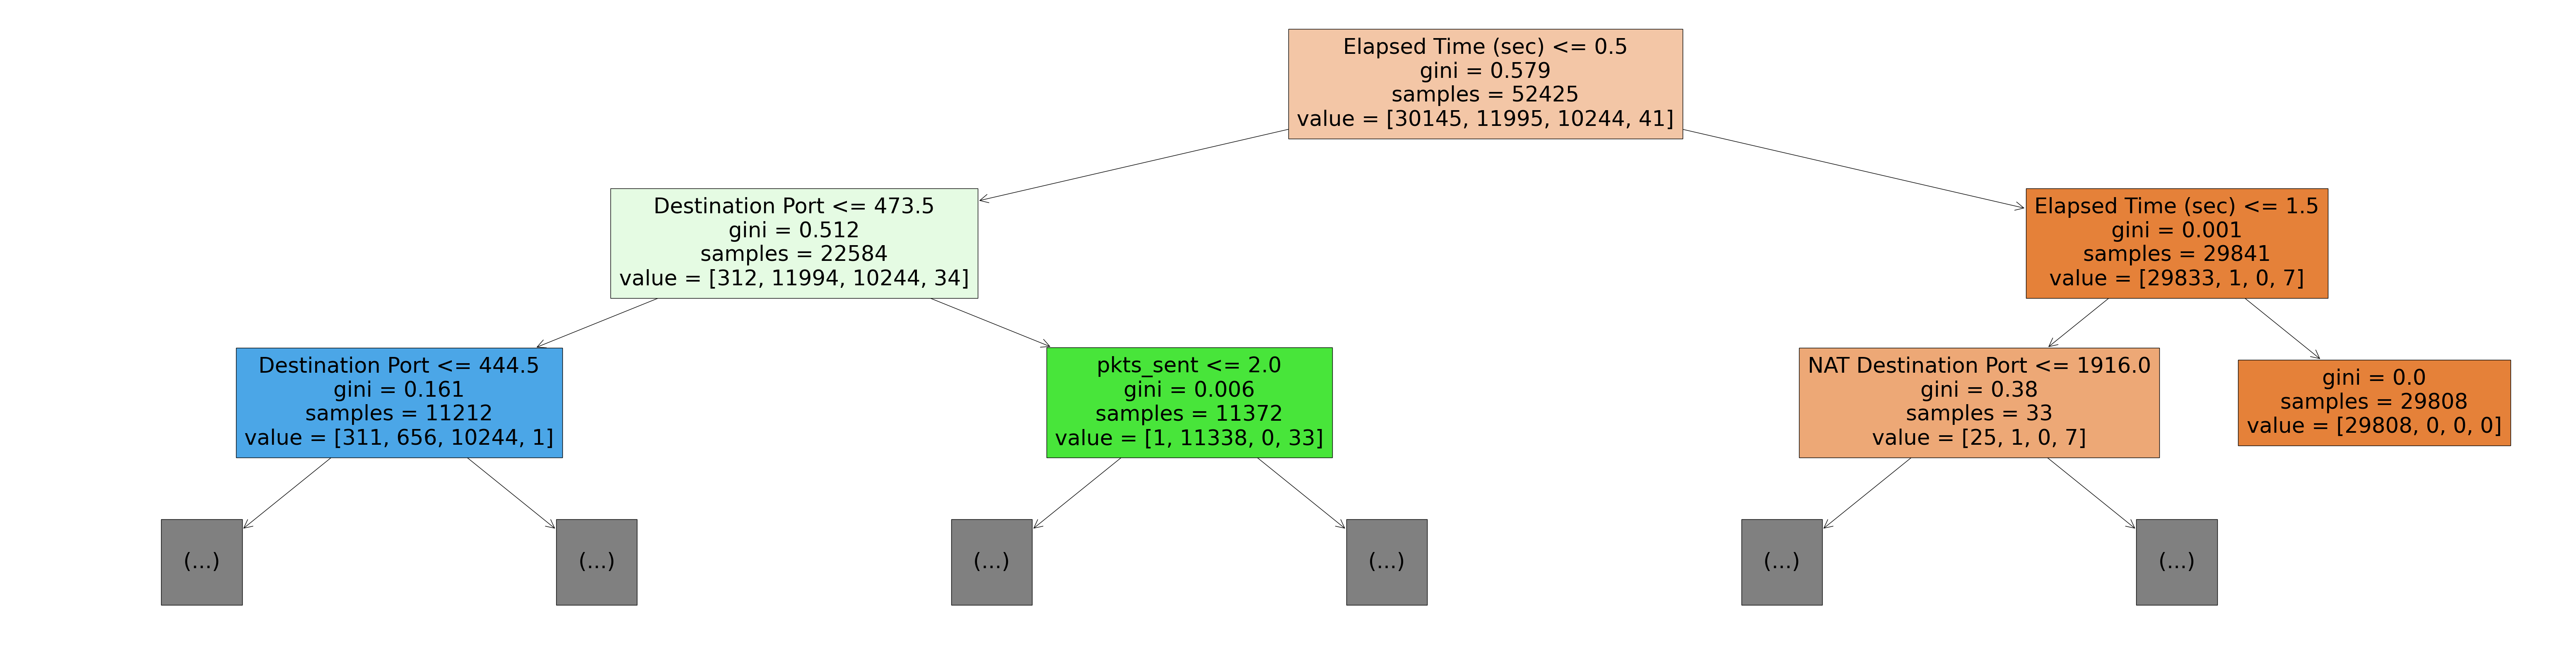

In [45]:
from sklearn import tree
from sklearn.metrics import classification_report
classifier_tr1=tree.DecisionTreeClassifier()
classifier_tr1.fit(x_train, y_train)
prediction_tr1=classifier_tr1.predict(x_test)
print("Prediction Shape is:")
print(prediction_tr1.shape)
print("F1 Score is")
print(classification_report(y_test, prediction_tr1))
print("Claasifier Score of xtrain and ytrain is")
print(classifier_tr1.score(x_train,y_train))
print("Claasifier Score of xtest and ytest is")
print(classifier_tr1.score(x_test,y_test))
print("Claasifier Score of xtest and prediction is")
print(classifier_tr1.score(x_test, prediction_tr1))

from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))
plot_tree(classifier_tr1, feature_names=x_train.columns, max_depth=2, filled=True);


### **Decision Tree Classification Model on Smote Data**

In [46]:
from sklearn import tree
from sklearn.metrics import classification_report
classifier_tr1=tree.DecisionTreeClassifier()
classifier_tr1.fit(x2_train, y2_train)
prediction_tr1=classifier_tr1.predict(x2_test)
print("Prediction Shape is:")
print(prediction_tr1.shape)
print("F1 Score is")
print(classification_report(y2_test, prediction_tr1))
print("Claasifier Score of x2train and y2train is")
print(classifier_tr1.score(x2_train,y2_train))
print("Claasifier Score of xtest and ytest is")
print(classifier_tr1.score(x2_test,y2_test))
print("Claasifier Score of xtest and prediction is")
print(classifier_tr1.score(x2_test, prediction_tr1))

Prediction Shape is:
(30112,)
F1 Score is
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7574
        deny       0.99      0.99      0.99      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.99      1.00      0.99      7530

    accuracy                           1.00     30112
   macro avg       1.00      1.00      1.00     30112
weighted avg       1.00      1.00      1.00     30112

Claasifier Score of x2train and y2train is
0.9997094181721573
Claasifier Score of xtest and ytest is
0.9963801806588736
Claasifier Score of xtest and prediction is
1.0


### **Decision Tree Classification Model on Original Scaled Data**

In [47]:
from sklearn import tree
from sklearn.metrics import classification_report
classifier_tr1=tree.DecisionTreeClassifier()
classifier_tr1.fit(x_train_sc, y_train)
prediction_tr1=classifier_tr1.predict(x_test_sc)
print("Prediction Shape is:")
print(prediction_tr1.shape)
print("F1 Score is")
print(classification_report(y_test, prediction_tr1))
print("Claasifier Score of xtrain and ytrain is")
print(classifier_tr1.score(x_train_sc,y_train))
print("Claasifier Score of xtest and ytest is")
print(classifier_tr1.score(x_test_sc,y_test))
print("Claasifier Score of xtest and prediction is")
print(classifier_tr1.score(x_test_sc, prediction_tr1))

Prediction Shape is:
(13107,)
F1 Score is
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.99      1.00      0.99      2992
        drop       1.00      1.00      1.00      2607
  reset-both       0.50      0.31      0.38        13

    accuracy                           1.00     13107
   macro avg       0.87      0.83      0.84     13107
weighted avg       1.00      1.00      1.00     13107

Claasifier Score of xtrain and ytrain is
0.9997329518359561
Claasifier Score of xtest and ytest is
0.9976348516060121
Claasifier Score of xtest and prediction is
1.0


### **Decision Tree Classification Model on SMOTE Scaled Data**

In [48]:
from sklearn import tree
from sklearn.metrics import classification_report
classifier_tr1=tree.DecisionTreeClassifier()
classifier_tr1.fit(x2_train_sc, y2_train)
prediction_tr1=classifier_tr1.predict(x2_test_sc)
print("Prediction Shape is:")
print(prediction_tr1.shape)
print("F1 Score is")
print(classification_report(y2_test, prediction_tr1))
print("Claasifier Score of x2train and y2train is")
print(classifier_tr1.score(x2_train_sc,y2_train))
print("Claasifier Score of xtest and ytest is")
print(classifier_tr1.score(x2_test_sc,y2_test))
print("Claasifier Score of xtest and prediction is")
print(classifier_tr1.score(x2_test_sc, prediction_tr1))

Prediction Shape is:
(30112,)
F1 Score is
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7574
        deny       0.99      0.99      0.99      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.99      1.00      0.99      7530

    accuracy                           1.00     30112
   macro avg       1.00      1.00      1.00     30112
weighted avg       1.00      1.00      1.00     30112

Claasifier Score of x2train and y2train is
0.9997094181721573
Claasifier Score of xtest and ytest is
0.9963801806588736
Claasifier Score of xtest and prediction is
1.0


### **Decision Tree Classification Model (Hyperparameter Tuning, Setting Max_Depth)**

I have set max_depth of decision tree to show the change in result. Tested on 20,40,60,80,90, the result gets better at more depth. Random_State can also be changed as per requirements.

In [49]:
from sklearn import tree
from sklearn.metrics import classification_report
classifier_tr1=tree.DecisionTreeClassifier(max_depth=3, random_state=25)
classifier_tr1.fit(x2_train_sc, y2_train)
prediction_tr1=classifier_tr1.predict(x2_test_sc)
print("Prediction Shape is:")
print(prediction_tr1.shape)
print("F1 Score is")
print(classification_report(y2_test, prediction_tr1))
print("Claasifier Score of x2train and y2train is")
print(classifier_tr1.score(x2_train_sc,y2_train))
print("Claasifier Score of xtest and ytest is")
print(classifier_tr1.score(x2_test_sc,y2_test))
print("Claasifier Score of xtest and prediction is")
print(classifier_tr1.score(x2_test_sc, prediction_tr1))

Prediction Shape is:
(30112,)
F1 Score is
              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7574
        deny       0.85      0.79      0.82      7515
        drop       1.00      1.00      1.00      7493
  reset-both       0.81      0.88      0.84      7530

    accuracy                           0.91     30112
   macro avg       0.91      0.91      0.91     30112
weighted avg       0.91      0.91      0.91     30112

Claasifier Score of x2train and y2train is
0.9109823326248672
Claasifier Score of xtest and ytest is
0.9131575451647184
Claasifier Score of xtest and prediction is
1.0


### **Decision Tree Classification Model (Hyperparameter Tuning, Setting Max_Lead Nodes)**

I have set low max_kead_nodes of decision tree to show the change in result. Tested on different values, the result gets better at more leaf nodes. Random_State can also be changed as per requirements.

In [50]:
from sklearn import tree
from sklearn.metrics import classification_report
classifier_tr1=tree.DecisionTreeClassifier(max_leaf_nodes=3, random_state=5)
classifier_tr1.fit(x2_train_sc, y2_train)
prediction_tr1=classifier_tr1.predict(x2_test_sc)
print("Prediction Shape is:")
print(prediction_tr1.shape)
print("F1 Score is")
print(classification_report(y2_test, prediction_tr1))
print("Claasifier Score of x2train and y2train is")
print(classifier_tr1.score(x2_train_sc,y2_train))
print("Claasifier Score of xtest and ytest is")
print(classifier_tr1.score(x2_test_sc,y2_test))
print("Claasifier Score of xtest and prediction is")
print(classifier_tr1.score(x2_test_sc, prediction_tr1))

Prediction Shape is:
(30112,)
F1 Score is


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       allow       1.00      0.99      1.00      7574
        deny       0.00      0.00      0.00      7515
        drop       0.94      1.00      0.97      7493
  reset-both       0.51      1.00      0.68      7530

    accuracy                           0.75     30112
   macro avg       0.61      0.75      0.66     30112
weighted avg       0.61      0.75      0.66     30112

Claasifier Score of x2train and y2train is
0.7465877391073327
Claasifier Score of xtest and ytest is
0.747442879914984
Claasifier Score of xtest and prediction is
1.0


## **RANDOM FOREST MODEL**

Hyperparameter Tuning in Random Forest Involves Estimator to be set different. 100 is usually by default value. setting maximum features, Minimum samples split, minimum sample leaf, min impurity decrease. I will be using few of these. 

### **Random Forest Model on Original Data**

In [51]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor(n_estimators=100)
RF_model.fit(x_train, encoded_y)
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
predictions1=RF_model.predict(x_test)
error=metrics.r2_score(encoded_yt, predictions1)
print("R Squared Error:" , error)
encoded_yt.shape
predictions1.shape
#y3=np.encoded_yt
from sklearn.metrics import r2_score
print(r2_score(encoded_yt, predictions1))
print("F1 Score is")
#print(classification_report(encoded_yt, predictions1))
r2_score1=r2_score(encoded_yt, predictions1)
print(r2_score)
print("Claasifier Score of xtrain and ytrain is")
print(RF_model.score(x_train,encoded_y))
print("Claasifier Score of xtest and ytest is")
print(RF_model.score(x_test,encoded_yt))
print("Claasifier Score of xtest and prediction is")
print(RF_model.score(x_test, predictions1))

R Squared Error: 0.9951172450960898
0.9951172450960898
F1 Score is
<function r2_score at 0x00000254D1E1F4C0>
Claasifier Score of xtrain and ytrain is
0.999137155457271
Claasifier Score of xtest and ytest is
0.9951172450960898
Claasifier Score of xtest and prediction is
1.0


### **Random Forest Model on Original Data (Setting N_Estimators=10)**

In [52]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor(n_estimators=10)
RF_model.fit(x_train, encoded_y)
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
predictions1=RF_model.predict(x_test)
error=metrics.r2_score(encoded_yt, predictions1)
print("R Squared Error:" , error)
encoded_yt.shape
predictions1.shape
#y3=np.encoded_yt
from sklearn.metrics import r2_score
print(r2_score(encoded_yt, predictions1))
print("F1 Score is")
#print(classification_report(encoded_yt, predictions1))
r2_score1=r2_score(encoded_yt, predictions1)
print(r2_score)
print("Claasifier Score of xtrain and ytrain is")
print(RF_model.score(x_train,encoded_y))
print("Claasifier Score of xtest and ytest is")
print(RF_model.score(x_test,encoded_yt))
print("Claasifier Score of xtest and prediction is")
print(RF_model.score(x_test, predictions1))

R Squared Error: 0.9946065801252242
0.9946065801252242
F1 Score is
<function r2_score at 0x00000254D1E1F4C0>
Claasifier Score of xtrain and ytrain is
0.9989964793028573
Claasifier Score of xtest and ytest is
0.9946065801252242
Claasifier Score of xtest and prediction is
1.0


### **Random Forest Model on Original Data (Setting N_Estimators=1000)**

In [53]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor(n_estimators=1000)
RF_model.fit(x_train, encoded_y)
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
predictions1=RF_model.predict(x_test)
error=metrics.r2_score(encoded_yt, predictions1)
print("R Squared Error:" , error)
encoded_yt.shape
predictions1.shape
#y3=np.encoded_yt
from sklearn.metrics import r2_score
print(r2_score(encoded_yt, predictions1))
print("F1 Score is")
#print(classification_report(encoded_yt, predictions1))
r2_score1=r2_score(encoded_yt, predictions1)
print(r2_score)
print("Claasifier Score of xtrain and ytrain is")
print(RF_model.score(x_train,encoded_y))
print("Claasifier Score of xtest and ytest is")
print(RF_model.score(x_test,encoded_yt))
print("Claasifier Score of xtest and prediction is")
print(RF_model.score(x_test, predictions1))

R Squared Error: 0.9952580846747084
0.9952580846747084
F1 Score is
<function r2_score at 0x00000254D1E1F4C0>
Claasifier Score of xtrain and ytrain is
0.9991572954334236
Claasifier Score of xtest and ytest is
0.9952580846747084
Claasifier Score of xtest and prediction is
1.0


### **Random Forest Model on Original Scaled Data (Setting N_Estimators=10)**

In [54]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor(n_estimators=10)
RF_model.fit(x_train_sc, encoded_y)
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
predictions1=RF_model.predict(x_test_sc)
error=metrics.r2_score(encoded_yt, predictions1)
print("R Squared Error:" , error)
encoded_yt.shape
predictions1.shape
#y3=np.encoded_yt
from sklearn.metrics import r2_score
print(r2_score(encoded_yt, predictions1))
print("F1 Score is")
#print(classification_report(encoded_yt, predictions1))
r2_score1=r2_score(encoded_yt, predictions1)
print(r2_score)
print("Claasifier Score of xtrain and ytrain is")
print(RF_model.score(x_train_sc,encoded_y))
print("Claasifier Score of xtest and ytest is")
print(RF_model.score(x_test_sc,encoded_yt))
print("Claasifier Score of xtest and prediction is")
print(RF_model.score(x_test_sc, predictions1))

R Squared Error: 0.9948880093873472
0.9948880093873472
F1 Score is
<function r2_score at 0x00000254D1E1F4C0>
Claasifier Score of xtrain and ytrain is
0.9989650673198648
Claasifier Score of xtest and ytest is
0.9948880093873472
Claasifier Score of xtest and prediction is
1.0


## **SUPPORT VECTOR MACHINE MODEL**

Hyperparameter Tuning of SVM involve change of Kernel or C value or gamma value etc. Kernal can be set as linear or poly or rbf or sigmoid. Similary C value can be set as C as float number, by default it is 0. and gamma value is by default scale, it can be set as auto or float number. 

### **SVM Model on Original Data**

In [55]:
from sklearn import svm
classifier_sv=svm.SVC(kernel='linear')
classifier_sv.fit(x_train, y_train
                  )

SVC(kernel='linear')

In [56]:
prediction_sv1=classifier_sv.predict(x_test)
y_test.shape
prediction_sv1.shape
print("F1 Score is")
print(classification_report(y_test, prediction_sv1))
print("Claasifier Score of xtrain and ytrain is")
print(classifier_sv.score(x_train,y_train))
print("Claasifier Score of xtest and ytest is")
print(classifier_sv.score(x_test,y_test))
print("Claasifier Score of xtest and prediction is")
print(classifier_sv.score(x_test, prediction_sv1))

F1 Score is
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       1.00      0.97      0.98      2992
        drop       0.97      1.00      0.99      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.99     13107
   macro avg       0.74      0.74      0.74     13107
weighted avg       0.99      0.99      0.99     13107

Claasifier Score of xtrain and ytrain is


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9915498330948975
Claasifier Score of xtest and ytest is
0.9920653086137179
Claasifier Score of xtest and prediction is
1.0


### **SVM Model on SMOTE Data**

In [ ]:
from sklearn import svm
classifier_sv=svm.SVC(kernel='linear')
classifier_sv.fit(x2_train, y2_train)

In [ ]:
prediction_sv1=classifier_sv.predict(x2_test)
y2_test.shape
prediction_sv1.shape
print("F1 Score is")
print(classification_report(y2_test, prediction_sv1))
print("Claasifier Score of xtrain and ytrain is")
print(classifier_sv.score(x2_train,y2_train))
print("Claasifier Score of xtest and ytest is")
print(classifier_sv.score(x2_test,y2_test))
print("Claasifier Score of xtest and prediction is")
print(classifier_sv.score(x2_test, prediction_sv1))

### **SVM Model on Original Scaled Data**

In [57]:
from sklearn import svm
classifier_sv=svm.SVC(kernel='linear')
classifier_sv.fit(x_train_sc, y_train)

SVC(kernel='linear')

In [58]:
prediction_sv1=classifier_sv.predict(x_test_sc)
y_test.shape
prediction_sv1.shape
print("F1 Score is")
print(classification_report(y_test, prediction_sv1))
print("Claasifier Score of xtrain and ytrain is")
print(classifier_sv.score(x_train_sc,y_train))
print("Claasifier Score of xtest and ytest is")
print(classifier_sv.score(x_test_sc,y_test))
print("Claasifier Score of xtest and prediction is")
print(classifier_sv.score(x_test_sc, prediction_sv1))

F1 Score is
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7495
        deny       0.99      0.97      0.98      2992
        drop       0.97      1.00      0.98      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.99     13107
   macro avg       0.74      0.74      0.74     13107
weighted avg       0.99      0.99      0.99     13107

Claasifier Score of xtrain and ytrain is


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.989585121602289
Claasifier Score of xtest and ytest is
0.9906919966430152
Claasifier Score of xtest and prediction is
1.0


### **SVM Model on SMOTE Data and setting Kernal=sigmoid**

In [59]:
from sklearn import svm
classifier_sv=svm.SVC(kernel='sigmoid')
classifier_sv.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [60]:
prediction_sv1=classifier_sv.predict(x_test)
y_test.shape
prediction_sv1.shape
print("F1 Score is")
print(classification_report(y_test, prediction_sv1))
print("Claasifier Score of xtrain and ytrain is")
print(classifier_sv.score(x_train,y_train))
print("Claasifier Score of xtest and ytest is")
print(classifier_sv.score(x_test,y_test))
print("Claasifier Score of xtest and prediction is")
print(classifier_sv.score(x_test, prediction_sv1))

F1 Score is
              precision    recall  f1-score   support

       allow       0.67      1.00      0.80      7495
        deny       0.98      0.66      0.79      2992
        drop       0.00      0.00      0.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.72     13107
   macro avg       0.41      0.41      0.40     13107
weighted avg       0.61      0.72      0.64     13107

Claasifier Score of xtrain and ytrain is


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7245970433953267
Claasifier Score of xtest and ytest is
0.7210650797283894
Claasifier Score of xtest and prediction is
1.0


### **SVM Model on SMOTE Data and setting Kernal=poly**

In [61]:
from sklearn import svm
classifier_sv=svm.SVC(kernel='poly')
classifier_sv.fit(x_train, y_train)

SVC(kernel='poly')

In [62]:
prediction_sv1=classifier_sv.predict(x_test)
y_test.shape
prediction_sv1.shape
print("F1 Score is")
print(classification_report(y_test, prediction_sv1))
print("Claasifier Score of xtrain and ytrain is")
print(classifier_sv.score(x_train,y_train))
print("Claasifier Score of xtest and ytest is")
print(classifier_sv.score(x_test,y_test))
print("Claasifier Score of xtest and prediction is")
print(classifier_sv.score(x_test, prediction_sv1))

F1 Score is
              precision    recall  f1-score   support

       allow       0.57      1.00      0.73      7495
        deny       0.00      0.00      0.00      2992
        drop       0.00      0.00      0.00      2607
  reset-both       0.00      0.00      0.00        13

    accuracy                           0.57     13107
   macro avg       0.14      0.25      0.18     13107
weighted avg       0.33      0.57      0.42     13107

Claasifier Score of xtrain and ytrain is


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5750119217930377
Claasifier Score of xtest and ytest is
0.5718318455786984
Claasifier Score of xtest and prediction is
1.0


### **EXAMPLE FOR ALLOW DATA**

In [63]:
example=[[60513, 47094, 45469, 47094, 320, 140, 180, 6, 7,3,3]]
scaled_example=scaler.transform(example)
print("Prediction by KNN Model:")
print(classifier3.predict(example)[0])
print("Prediction by Logistic Regression Model:")
print(model7.predict(example)[0])
print("Prediction by Linear Regression Model:")
print(LR2.predict(example)[0])
print("Prediction by Decision Tree Model:")
print(classifier_tr1.predict(example)[0])
print("Prediction by Random Forest Model:")
print(RF_model.predict(example)[0])
print("Prediction by SVM Model:")
print(classifier_sv.predict(example)[0])

Prediction by KNN Model:
allow
Prediction by Logistic Regression Model:
allow
Prediction by Linear Regression Model:
-0.23654150416377462
Prediction by Decision Tree Model:
allow
Prediction by Random Forest Model:
0.0
Prediction by SVM Model:
allow


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

In [64]:
example=[[60513, 47094, 45469, 47094, 320, 140, 180, 6, 7,3,3]]
scaled_example=scaler.transform(example)
print("Prediction by KNN Model:")
print(classifier3.predict(example)[0])
print("Prediction by Logistic Regression Model:")
print(model7.predict(example)[0])
print("Prediction by Linear Regression Model:")
print(LR2.predict(example)[0])
print("Prediction by Decision Tree Model:")
print(classifier_tr1.predict(example)[0])
print("Prediction by Random Forest Model:")
print(RF_model.predict(example)[0])
print("Prediction by SVM Model:")
print(classifier_sv.predict(example)[0])

Prediction by KNN Model:
allow
Prediction by Logistic Regression Model:
allow
Prediction by Linear Regression Model:
-0.23654150416377462
Prediction by Decision Tree Model:
allow
Prediction by Random Forest Model:
0.0
Prediction by SVM Model:
allow


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

In [65]:
example2=[[60513, 47, 0, 0, 320, 140, 1, 0, 1,3,1]]
scaled_example2=scaler.transform(example2)
print("Prediction by KNN Model:")
print(classifier3.predict(example2)[0])
print("Prediction by Logistic Regression Model:")
print(model7.predict(example2)[0])
print("Prediction by Linear Regression Model:")
print(LR2.predict(example2)[0])
print("Prediction by Decision Tree Model:")
print(classifier_tr1.predict(example2)[0])
print("Prediction by Random Forest Model:")
print(RF_model.predict(example2)[0])
print("Prediction by SVM Model:")
print(classifier_sv.predict(example2)[0])

Prediction by KNN Model:
deny
Prediction by Logistic Regression Model:
drop
Prediction by Linear Regression Model:
83.3374633070938
Prediction by Decision Tree Model:
allow
Prediction by Random Forest Model:
0.0
Prediction by SVM Model:
allow


C:\Users\engrs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\engrs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

# **IMPLEMENTING PIPELINE:**

## **WARNING FILTER**

In [66]:
#Warning Filter,
import warnings
warnings.filterwarnings("ignore")

## **IMPORTING LIBRARIES**

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import utils

## **SEGREGATING INPUT & OUTPUT (LABELS)**

In [69]:
x9=df.drop(["Action"], axis=1)

In [70]:
y9=df["Action"]

## **SPLITTING DATA INTO TRAIN AND TEST PART**

In [71]:
x9_train,x9_test, y9_train, y9_test=train_test_split(x9,y9,test_size=0.2, random_state=21)

## **LABELING CATEGORICAL DATA INTO NUMERICAL**

In [72]:
lab_enc=preprocessing.LabelEncoder()
encoded_y9_df=lab_enc.fit_transform(y9)
encoded_y9=lab_enc.fit_transform(y9_train)
encoded_y9t=lab_enc.fit_transform(y9_test)
np.set_printoptions(threshold=np.inf)
print(encoded_y9)

[2 1 0 0 0 2 1 0 1 2 0 1 0 0 0 1 2 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 2 0 0 0 2
 0 0 0 0 0 0 1 2 2 0 2 0 0 0 2 2 2 0 2 1 1 2 2 2 0 1 2 0 0 0 2 0 2 0 2 0 0
 0 0 2 0 2 2 0 1 1 1 0 0 1 0 1 1 0 0 2 0 2 2 2 2 0 0 0 0 2 1 0 0 1 0 0 2 0
 0 1 0 0 0 0 2 0 2 0 0 2 0 2 1 0 2 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 2 0 0
 0 1 0 0 0 2 0 1 2 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 2 1 0 1 0 2 0 1 0 0 2
 2 1 0 0 2 1 0 0 0 0 0 0 2 2 2 0 2 0 2 0 0 0 1 0 1 2 0 0 0 0 0 1 1 0 0 2 0
 0 1 0 2 0 0 2 1 2 0 0 0 2 2 2 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 2 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 2 0
 1 0 1 0 0 0 0 2 1 0 1 0 2 1 1 1 0 0 1 1 1 2 1 0 0 1 0 0 1 0 0 2 1 0 0 2 0
 1 0 2 0 1 0 2 0 1 0 1 0 0 1 1 2 2 0 1 2 0 0 2 0 0 0 1 1 0 0 2 1 1 0 1 0 0
 0 2 0 2 1 2 0 0 0 1 0 2 0 0 1 0 2 2 2 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1
 0 1 1 0 1 2 2 0 0 2 0 0 0 1 2 0 2 2 0 2 0 2 0 2 0 0 1 0 2 1 0 1 0 0 0 0 0
 0 2 0 0 0 0 0 1 1 0 0 0 0 0 0 2 1 0 0 1 2 2 0 0 0 0 2 0 1 2 2 0 0 0 0 2 0
 0 2 1 1 0 2 2 0 1 1 2 1 

## **DEFINING PIPELINE FOR KNN MODEL:**

In [73]:
KNNPipeline=Pipeline([("myscaler", StandardScaler()),
                    ("mysmote", SMOTE()),
                    ("myModel", KNeighborsClassifier())])

## **DEFINING PIPELINE FOR LOGISTIC REGRESSION MODEL:**

In [74]:
LogisticRegressionPipeline=Pipeline([("myscaler", StandardScaler()),
                    ("mysmote", SMOTE()),
                    ("myModel", LogisticRegression())])

## **DEFINING PIPELINE FOR LINEAR REGRESSION MODEL:**

In [75]:
LinearRegressionPipeline=Pipeline([("myscaler", StandardScaler()),
                    ("mysmote", SMOTE()),
                    ("myModel", LinearRegression())])

## **DEFINING PIPELINE FOR DECISION TREE MODEL:**

In [76]:
TreePipeline=Pipeline([("myscaler", StandardScaler()),
                    ("mysmote", SMOTE()),
                    ("myModel", DecisionTreeClassifier())])

## **DEFINING PIPELINE FOR RANDOM FOREST REGRESSION MODEL:**


In [77]:
RandomForestPipeline=Pipeline([("myscaler", StandardScaler()),
                    ("mysmote", SMOTE()),
                    ("myModel", RandomForestRegressor())])

## **DEFINING PIPELINE FOR SVM MODEL:**


In [78]:
SVMPipeline=Pipeline([("myscaler", StandardScaler()),
                    ("mysmote", SMOTE()),
                    ("myModel", SVC())])

## **DEFINING MYPIPELINE AND ADDING ALL MODELS IN IT:**


In [79]:
mypipeline=[KNNPipeline, LogisticRegressionPipeline, LinearRegressionPipeline, TreePipeline, RandomForestPipeline, SVMPipeline]

## **DEFINING INITIAL SCORE AS ZERO**


In [80]:
accuracy=0.0
classifier=0
pipeline=""

## **ASSIGNING NUMBERICAL VALUE TO EACH MODEL VARIABLE, AND USING FOR LOOP TO FIT PIPELINE TO ALL MODELS:**

In [81]:
PipelineDict={0: "KNNPipeline", 1:"LogisticRegressionPipeline", 2:"LinearRegressionPipeline", 3:"TreePipeline", 4: "RandomForestPipeline", 5: "SVMPipeline"}
for mypipe in mypipeline:
  mypipe.fit(x9_train, encoded_y9)

## **USING FOR LOOP TO FIND SCORE OF ALL MODELS>**

In [82]:
for i, model in enumerate(mypipeline):
  print("{} Test Accuracy: {}".format(PipelineDict[i], model.score(x9_test, encoded_y9t)))

KNNPipeline Test Accuracy: 0.987182421606775
LogisticRegressionPipeline Test Accuracy: 0.9206530861371786
LinearRegressionPipeline Test Accuracy: -0.3995161741798612
TreePipeline Test Accuracy: 0.9965667200732433
RandomForestPipeline Test Accuracy: 0.9895807012469702
SVMPipeline Test Accuracy: 0.9473563744563973


## **DISPLAYING SHAPE OF TRAIN AND TEST INPUT & OUTPUT**

In [83]:
x9_train.shape, x9_test.shape,encoded_y9.shape, encoded_y9t.shape

((52425, 11), (13107, 11), (52425,), (13107,))

## **USING FOR LOOP TO SELECT BEST MODEL IN PIPELINE**

In [84]:
for i, model in enumerate(mypipeline):
  if (model.score(x9_test, encoded_y9t))>accuracy:
    accuracy=model.score(x9_test, encoded_y9t)
    pipeline=model
    classifier=i
print("Best Model in Pipeline is:{}".format(PipelineDict[classifier]))

Best Model in Pipeline is:TreePipeline
